In [145]:
                                            # PARTE 1 - MODELAMIENTO POTENCIA DE UN CICLISTA
# 4.1 planteamiento del problema  
# Punto 1
import sympy as sp
from sympy.physics.mechanics import *


vgs, g, w, alpha, crr, cdA, ro, vhw, lossdt = sp.symbols('v_gs g w alpha c_rr cdA ro vhw loss_dt')

# Definir la ecuación
ecuacion_plegs = (vgs * (((g * w * sp.sin(alpha)) + (g * w * sp.cos(alpha)) * crr) + (1/2 * cdA * ro * (vhw)**2)) + cdA * ro * vhw * vgs**2 + (1/2 * cdA * ro * vgs**3)) / (1 - (lossdt))
ecuacion_plegs

(0.5*cdA*ro*v_gs**3 + cdA*ro*v_gs**2*vhw + v_gs*(c_rr*g*w*cos(alpha) + 0.5*cdA*ro*vhw**2 + g*w*sin(alpha)))/(1 - loss_dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


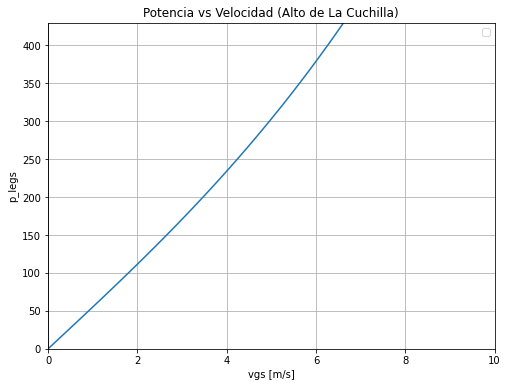

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


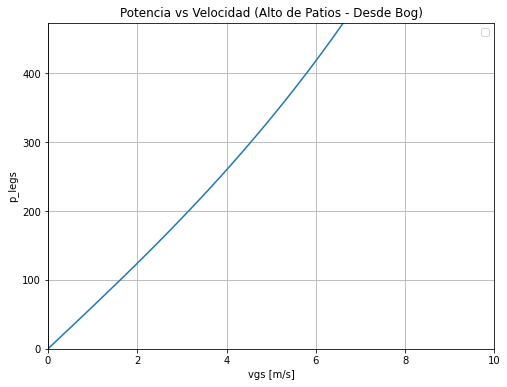

In [221]:
# Punto 2

import numpy as np
import matplotlib.pyplot as plt

vgs_cuchilla = np.linspace(start=0, stop=6.62, num=101)  # Cambiado el rango de vgs a valores positivos
vgs_patios = np.linspace(start=0, stop=6.68, num=101)
g = 9.81 
w = 83.50
alpha_cuchilla = 6.2/100
alpha_patios = 6.9/100
crr = 5e-3
cdA = 0.35 
ro = 1.29 #kg/m^3
vhw = 0
lossdt = 2/100
distancia_cuchilla = 11120 #m
distancia_patios = 5910 #m

def ec1(vgs):
    return vgs * (((g * w * np.sin(alpha_cuchilla)) + (g * w * np.cos(alpha_cuchilla)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)/(1-(lossdt))

def ec2(vgs):
    return vgs * (((g * w * np.sin(alpha_patios)) + (g * w * np.cos(alpha_patios)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)/(1-(lossdt))

p_legs_cuchilla = ec1(vgs_cuchilla)
p_legs_patios = ec2(vgs_patios)


plt.figure(figsize=(8, 6))
plt.plot(vgs, p_legs_cuchilla)
plt.xlabel('vgs [m/s]')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad (Alto de La Cuchilla)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs_cuchilla))  
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(vgs, p_legs_patios)
plt.xlabel('vgs [m/s]')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad (Alto de Patios - Desde Bog)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs_patios))  
plt.show()


<ipython-input-269-2a60a69ee7ec>:1: RuntimeWarning: divide by zero encountered in divide
  tiempo_cuchilla = distancia_cuchilla/vgs_cuchilla
<ipython-input-269-2a60a69ee7ec>:2: RuntimeWarning: divide by zero encountered in divide
  tiempo_patios = distancia_patios/vgs_patios
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


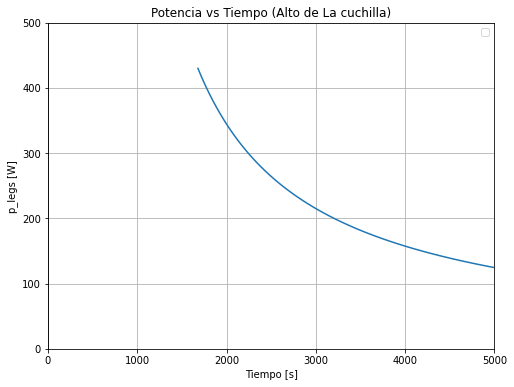

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


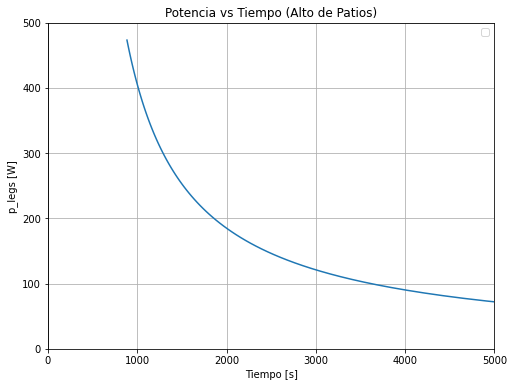

In [269]:
tiempo_cuchilla = distancia_cuchilla/vgs_cuchilla
tiempo_patios = distancia_patios/vgs_patios

plt.figure(figsize=(8, 6))
plt.plot(tiempo_cuchilla, p_legs_cuchilla)
plt.xlabel('Tiempo [s]')
plt.ylabel('p_legs [W]')
plt.title('Potencia vs Tiempo (Alto de La cuchilla)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0,5000) # defino un limite en el eje x que sea mucho mayor que el mejor tiempo registrado en strava para poder
                    # notar de una mejor manera el tiempo.
plt.ylim(0,500)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(tiempo_patios, p_legs_patios)
plt.xlabel('Tiempo [s]')
plt.ylabel('p_legs [W]')
plt.title('Potencia vs Tiempo (Alto de Patios)')
plt.legend()
plt.xlim(0,5000)
plt.ylim(0,500)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


In [271]:
# Punto 3
# se hizo una interpolación para poder calcular con mayor exactitud el tiempo que le tomaría al ciclista completar 
# los dos puertos

valor_objetivo = 237
vgs_objetivo_cuchilla = np.interp(valor_objetivo, p_legs_cuchilla, vgs_cuchilla)
tiempo_cuchilla_objetivo = round(distancia_cuchilla / vgs_objetivo_cuchilla, 2)

vgs_objetivo_patios = np.interp(valor_objetivo, p_legs_patios, vgs_patios)
tiempo_patios_objetivo = round(distancia_patios / vgs_objetivo_patios, 2)

print('El tiempo que le toma al ciclista completar el alto de Patios es de:', tiempo_patios_objetivo, 'segundos.')
print('El tiempo que le toma al ciclista completar el alto de Patios es de:', tiempo_cuchilla_objetivo, 'segundos.')

1589.62 2749.91
El tiempo que le toma al ciclista completar el alto de Patios es de: 1589.62 segundos.
El tiempo que le toma al ciclista completar el alto de Patios es de: 2749.91 segundos.


*Punto 3* 


Si un ciclista tiene una potencia promedio de 237 W, al observar las gráficas se puede concluir que completaría el Alto de La Cuchilla en aproximadamente 2500 segundos o 41,66 minutos. Por otro lado, completaría el alto de Patios en aproximadamente 1600 segundos o 26,66 minutos.

In [267]:
# Punto 4
w_1 = w - 1
w_5 = w - 5

def ec3(vgs):
    return vgs * (((g * w_1 * np.sin(alpha_cuchilla)) + (g * w_1 * np.cos(alpha_cuchilla)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)/(1-(lossdt))

def ec4(vgs):
    return vgs * (((g * w_5 * np.sin(alpha_cuchilla)) + (g * w_5 * np.cos(alpha_cuchilla)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)/(1-(lossdt))

p_legs_cuchilla_1 = ec3(vgs_cuchilla)   #calculo la potencia para cada una de las reducciones de peso
p_legs_patios_1 = ec3(vgs_patios)

p_legs_cuchilla_5 = ec4(vgs_cuchilla)
p_legs_patios_5 = ec4(vgs_patios)

#PARA LA REDUCCION EN 1 KG
valor_objetivo = 237               # Como es el mismo ciclista, se tiene la misma potencia promedio
vgs_objetivo_cuchilla_1= np.interp(valor_objetivo, p_legs_cuchilla_1, vgs_cuchilla)
tiempo_cuchilla_objetivo_1 = distancia_cuchilla / vgs_objetivo_cuchilla_1

vgs_objetivo_patios_1 = np.interp(valor_objetivo, p_legs_patios_1, vgs_patios)
tiempo_patios_objetivo_1 = distancia_patios / vgs_objetivo_patios_1


#PARA LA REDUCCION EN 5 KG
vgs_objetivo_cuchilla_5 = np.interp(valor_objetivo, p_legs_cuchilla_5, vgs_cuchilla)
tiempo_cuchilla_objetivo_5 = distancia_cuchilla / vgs_objetivo_cuchilla_5

vgs_objetivo_patios_5 = np.interp(valor_objetivo, p_legs_patios_5, vgs_patios)
tiempo_patios_objetivo_5 = distancia_patios / vgs_objetivo_patios_5

#MEJORÍA DE TIEMPOS
mejoria_cuchilla_1=  round(tiempo_cuchilla_objetivo - tiempo_cuchilla_objetivo_1, 2)
mejoria_cuchilla_5=  round(tiempo_cuchilla_objetivo - tiempo_cuchilla_objetivo_5, 2)

mejoria_patios_1=  round(tiempo_patios_objetivo - tiempo_patios_objetivo_1, 2)
mejoria_patios_5=  round(tiempo_patios_objetivo - tiempo_patios_objetivo_5, 2)

print('La mejoría en el Alto de La cuchilla si se reduce 1 kg de peso es de', mejoria_cuchilla_1, 'segundos de ganancia.')
print('La mejoría en el Alto de La cuchilla si se reducen 5 kg de peso es de: ', mejoria_cuchilla_5, 'segundos de ganancia.')
print('La mejoría en el Alto de Patios si se reduce 1 kg de peso es de: ', mejoria_patios_1, 'segundos de ganancia.')
print('La mejoría en el Alto de Patios si se reducen 5 kg de peso es de: ', mejoria_patios_5, 'segundos de ganancia.')

La mejoría en el Alto de La cuchilla si se reduce 1 kg de peso es de 27.24 segundos de ganancia.
La mejoría en el Alto de La cuchilla si se reducen 5 kg de peso es de:  135.3 segundos de ganancia.
La mejoría en el Alto de Patios si se reduce 1 kg de peso es de:  142.6 segundos de ganancia.
La mejoría en el Alto de Patios si se reducen 5 kg de peso es de:  200.02 segundos de ganancia.


*Punto 5*

Con respecto a la dificultad del Alto de la Cuchilla y el Alto de Patios, se puede evidenciar al comparar las gráficas de potencia contra tiempo se nota que el Alto de la Cuchilla es más difícil. Se ve que este la curva del alto de patios es más concava, o sea, tiene una pendiente más inclinada lo que indica que se mantiene una mayor potencia durante menos tiempo. A comparación con el alto de la cuchilla, por la forma de la curva y la pendiente de esta hay que mantener una mayor potencia durante un mayor tiempo. Además, si situamos el punto de 200 W de potencia como referencia en el Alto de Patios es necesario que el ciclista mantenga esta potencia promedio durante los primeros 1900 segundos aproximadamente, por otro lado el Alto de la Cuchilla requiere que el ciclista mantenga esta misma potencia durante unos 3200 segundos aproximadamente.

Si bien el Alto de Patios tiene una mayor pendiente, el Alto de la Cuchilla es mayor en cada una de las variables consignadas en el excel de *puertos*: Es más largo en longitud, tiene mayor elevacion máxima y mínima, se gana más elevación y por supuesto tiene un mayor tiempo registrado en Strava comparado con Patios. Estas variables afectan la resistencia del ciclista y hacen irrefutable el hecho que el alto de la cuchilla es más difícil que el alto de Patios.

In [216]:
# 4.2 Procesamiento de datos
# Punto 1 - Cadencia encima de 70 debajo de 90
import pandas as pd

archivo = 'data/data.CSV'
datos = pd.read_csv(archivo)

datos_filtrados = datos[(datos[' cadence [rpm]'] > 70) & (datos[' cadence [rpm]'] < 90)] #aplico el filtro
prom_cardiaca = datos_filtrados[' heartrate [bpm]'].mean() #promedio de la frecuencia

print("Datos filtrados:") #output
print(datos_filtrados)

print("La frecuencia cardíaca promedio en el set de datos filtrados es de", prom_cardiaca, 'bpm')



Datos filtrados:
      time [s]   distance [m]   watts [W]   heartrate [bpm]   cadence [rpm]  \
20        1969         7147.4         224               171              89   
21        1970         7152.8         255               170              85   
22        1971         7158.2         377               171              85   
35        1984         7227.5         263               176              89   
36        1985         7232.2         296               176              89   
...        ...            ...         ...               ...             ...   
2580      4543        16144.1         322               186              76   
2581      4544        16146.9         364               186              82   
2582      4545        16151.4         326               186              87   
2583      4546        16154.8         268               187              87   
2584      4547        16158.1         268               186              88   

       velocity_smooth [m/s]   alt

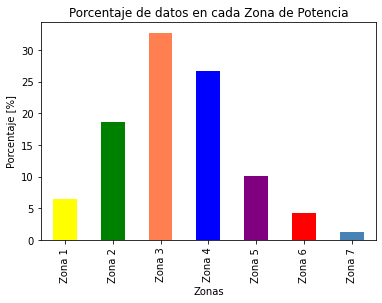

In [217]:
# Punto 2
# Definir los límites de las zonas de potencia
zonas = {
    'Zona 1': (0, 130),
    'Zona 2': (130, 178),
    'Zona 3': (178, 213),
    'Zona 4': (213, 249),
    'Zona 5': (249, 284),
    'Zona 6': (284, 356),
    'Zona 7': (356, 1500)
}

for zona, limites in zonas.items(): # Creo una columna en el df que me indica donde está cada dato
    datos[zona] = ((datos[' watts [W]'] >= limites[0]) & (datos[' watts [W]'] < limites[1])).astype(int)

porcentaje = datos[list(zonas.keys())].mean() * 100 # hallo el porcentaje de cada zona

fig, ax = plt.subplots() # creo un diagrama de barras
colores = ['yellow', 'green', 'coral', 'blue', 'purple', 'red', 'steelblue']

porcentaje.plot(kind='bar', ax=ax, color = colores)
ax.set_ylabel('Porcentaje [%]')
ax.set_xlabel('Zonas')
ax.set_title('Porcentaje de datos en cada Zona de Potencia')
plt.show()


Escogimos la gráfica de barra ya que esta permite presentar la distribución de datos de categorías distintas de una forma ordenada y clara, aunque simple y de fácil lectura para el usuario. 


In [218]:
# 4.3 Curva de potencia de un ciclista
# Punto 1 

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
archivo_pot = 'data/curva-potencia.CSV'
datos_pot = pd.read_csv(archivo_pot)

curv_potencia = datos_pot['Power [W]']
tiempo_curv = datos_pot['Time [s]']

interpolacion = interp1d(tiempo_curv, curv_potencia, kind='cubic') # hago la interpolación

tiempo_interpolado = np.linspace(tiempo_curv.min(), tiempo_curv.max(), 1000) #creo los datos para la curva interpolada 
potencia_interpolada = interpolacion(tiempo_interpolado) #hago la interpolación

# Graficar los datos y la curva interpolada
plt.plot(tiempo_curv, curv_potencia, 'o', label='Datos originales')
plt.plot(tiempo_interpolado, potencia_interpolada, '-', label='Interpolación cúbica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Potencia [W]')
plt.title('Potencia del Ciclista')
plt.legend()
plt.show()


KeyError: 'Power [W]'

Con respecto a la interpolación que se realizó al conjunto de datos, decidimos utilizar un interpolador cúbico dado el comportamiento que presentaba la gráfica de los datos originales: una curva suave y contínua. Para una gráfica con estas características funciona a la perfección esta clase de interpolación, mientras que una interpolación lineal o polinómica funcionarían mejor con un conjunto de datos con un comportamiento más variante y lineal o en su defecto cuadrático.

In [164]:
# 4.4 Tiempo mínimo de finalización de un puerto para un ciclista


#
